***
# <font color=blue size=10>Exercícios</font>
***

## Exercícios Estatística

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios mais atual que a utilizada em nossos experimentos.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.



# <font color=blue>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [12]:
df = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [14]:
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [9]:
sm = 788
bins = [0,5*sm,10*sm,15*sm,25*sm,np.inf]

### 2º Definir os labels das classes

In [10]:
labels = ['E (≤5 SM)','D (5–10 SM)','C (10–15 SM)','B (15–25 SM)','A (>25 SM)']

### 3º Construir a coluna de frequências

In [22]:
df['Classe_Renda'] = pd.cut(df['Renda'], bins=bins, labels=labels, right=False)
frequencia = df.groupby('Classe_Renda').size().reindex(labels).reset_index(name = 'Frequencia')
frequencia

/tmp/ipykernel_41336/2349431051.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequencia = df.groupby('Classe_Renda').size().reindex(labels).reset_index(name = 'Frequencia')


,Classe_Renda,Frequencia
0,E (≤5 SM),68329
1,D (5–10 SM),5700
2,C (10–15 SM),1568
3,B (15–25 SM),823
4,A (>25 SM),420


### 4º Construir a coluna de percentuais

In [27]:
total = len(df)
perc = (df.groupby('Classe_Renda').size() / total) * 100
perc = perc.sort_index().reset_index(name = 'Percentual')
perc

/tmp/ipykernel_41336/3645749017.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  perc = (df.groupby('Classe_Renda').size() / total) * 100


,Classe_Renda,Percentual
0,E (≤5 SM),88.923738
1,D (5–10 SM),7.418011
2,C (10–15 SM),2.040604
3,B (15–25 SM),1.071057
4,A (>25 SM),0.546590


### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [33]:
tabela_frequencia = pd.merge(frequencia, perc, on='Classe_Renda', how='inner')
tabela_frequencia

,Classe_Renda,Frequencia,Percentual
0,E (≤5 SM),68329,88.923738
1,D (5–10 SM),5700,7.418011
2,C (10–15 SM),1568,2.040604
3,B (15–25 SM),823,1.071057
4,A (>25 SM),420,0.546590


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

/tmp/ipykernel_41336/1391417217.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabela_frequencia, x='Classe_Renda', y='Frequencia', palette='Blues_d')


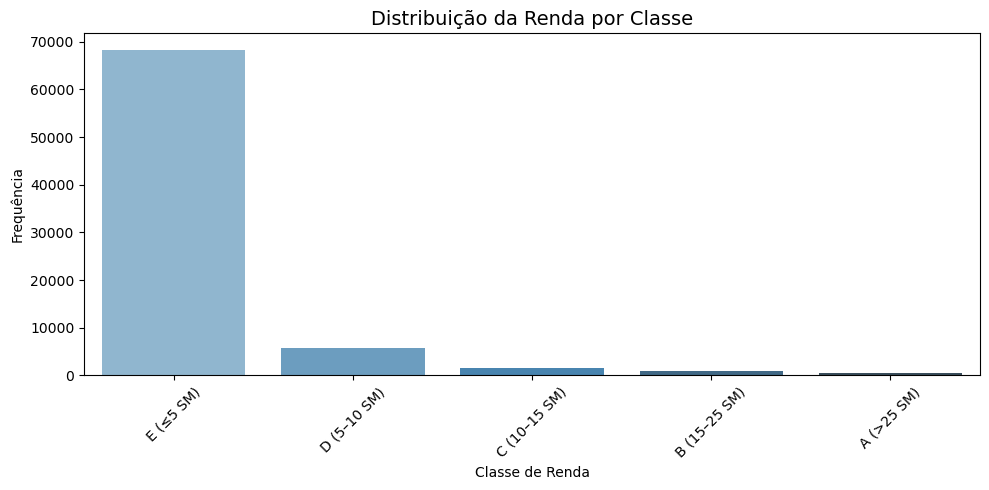

In [41]:
plt.figure(figsize=(10, 5))
sns.barplot(data=tabela_frequencia, x='Classe_Renda', y='Frequencia', palette='Blues_d')
plt.title('Distribuição da Renda por Classe', fontsize=14)
plt.xlabel('Classe de Renda')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> ### Conclusões

Neste estudo, foram definidas cinco categorias de renda baseadas em faixas de salários mínimos, com o objetivo de compreender melhor a distribuição dos rendimentos na população analisada. As classes variam desde a categoria "E", que engloba indivíduos com renda de até cinco salários mínimos, até a categoria "A", que representa aqueles com rendimentos superiores a 25 salários mínimos mensais.

Os dados indicam uma forte concentração da população nas faixas de renda mais baixas. A classe "E", que compreende indivíduos que recebem até cinco salários mínimos, representa aproximadamente 88,9% do total da amostra. Essa elevada proporção revela que a esmagadora maioria da população analisada possui renda relativamente baixa, o que pode estar associado a limitações no acesso a recursos econômicos e oportunidades.

A classe "D", que corresponde à faixa de renda entre cinco e dez salários mínimos, abriga cerca de 7,4% dos indivíduos, indicando uma parcela menor, porém relevante, da população com rendimentos medianos.

As faixas superiores apresentam representatividade significativamente menor. A classe "C" (10 a 15 salários mínimos) corresponde a cerca de 2,0%, enquanto as classes "B" (15 a 25 salários mínimos) e "A" (acima de 25 salários mínimos) somam, juntas, pouco mais de 1,6% da população total. Isso evidencia a concentração da renda em patamares baixos, com uma minoria detendo rendimentos elevados.

Essa configuração evidencia um padrão de desigualdade econômica, em que uma grande parcela da população possui renda baixa e apenas uma pequena fração alcança níveis elevados de salário. Tal distribuição sugere desafios para políticas públicas no que se refere à inclusão social e redução das disparidades econômicas.

Portanto, é fundamental o desenvolvimento de estratégias que promovam a melhoria das condições salariais e o acesso a oportunidades, especialmente para as camadas mais vulneráveis da população, com vistas a fomentar um crescimento econômico mais justo e equilibrado.




### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

/home/guilherme-zanin/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 76840.
  res = hypotest_fun_out(*samples, **kwds)
/home/guilherme-zanin/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 76840.
  res = hypotest_fun_out(*samples, **kwds)
/home/guilherme-zanin/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 76840.
  res = hypotest_fun_out(*samples, **kwds)
/home/guilherme-zanin/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 76840.
  res = hypotest_fun_out(*samples, **kwds)


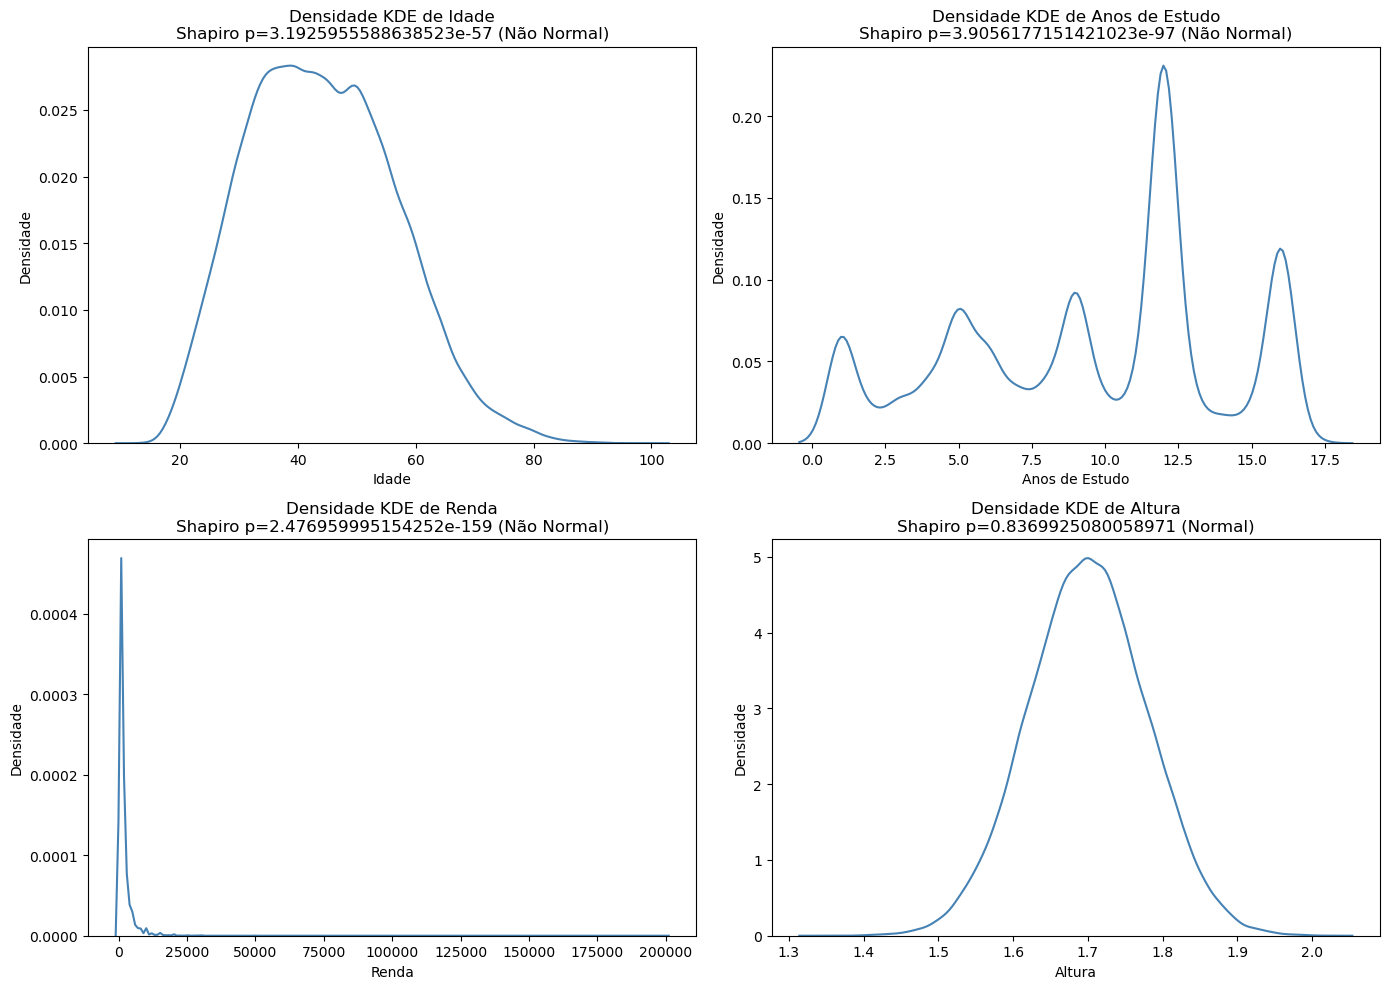

In [ ]:
variaveis_quantitativas = ['Idade', 'Anos de Estudo', 'Renda', 'Altura']
plt.figure(figsize=(14, 10))

for i, var in enumerate(variaveis_quantitativas, 1):
    plt.subplot(2, 2, i)
    
    sns.kdeplot(df[var].dropna(), fill=False, color='steelblue', bw_adjust=1)
    stat, p = shapiro(df[var].dropna())
    resultado = "Normal" if p > 0.05 else "Não Normal"
    
    plt.title(f'Densidade KDE de {var}\nShapiro p={p} ({resultado})')
    plt.xlabel(var)
    plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

> ### Conclusões

Analisando as distribuições das quatro variáveis numéricas — Idade, Anos de Estudo, Renda e Altura — observa-se o seguinte comportamento:

A variável Idade apresenta concentração predominante entre 20 e 50 anos, o que é consistente com a faixa etária economicamente ativa, englobando indivíduos provavelmente inseridos no mercado de trabalho ou em processo educacional. Visualmente, a distribuição sugere um formato próximo da normalidade, contudo, ao aplicar o teste estatístico de normalidade (Shapiro-Wilk), verificou-se que a hipótese de normalidade para a Idade foi rejeitada.

Quanto aos Anos de Estudo, o gráfico evidencia um pico concentrado em torno de 11 a 12 anos, indicando que uma parcela significativa dos indivíduos completou o ensino médio. As categorias extremas, tanto com escolaridade muito baixa (menos de 1 ano) quanto com escolaridade elevada (mais de 15 anos), aparecem em proporções reduzidas. A distribuição desta variável não se apresenta próxima de uma normal, o que foi confirmado pelos testes estatísticos aplicados.

A variável Renda demonstra uma distribuição fortemente assimétrica à direita, caracterizada por uma grande concentração de indivíduos com baixos rendimentos próximos a zero e uma "cauda longa" que indica a presença de poucos indivíduos com rendas elevadas. Tal comportamento é típico em distribuições de renda, refletindo a desigualdade econômica observada em muitas populações. Naturalmente, esta variável não segue uma distribuição normal.

Por fim, a variável Altura apresenta uma distribuição que se aproxima visualmente de uma curva normal, com concentração dos valores na faixa entre 1,6 m e 1,7 m e poucos casos em extremos muito baixos ou muito altos. Diferentemente da Idade, a hipótese de normalidade não foi rejeitada para a Altura nos testes estatísticos realizados, indicando conformidade com a distribuição normal.

Em resumo, apesar de as distribuições de Idade e Altura sugerirem visualmente normalidade, apenas a Altura atende aos critérios estatísticos para ser considerada normalmente distribuída. As variáveis Anos de Estudo e Renda apresentam distribuições claramente não normais, refletindo características específicas dos dados socioeconômicos analisados.



### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

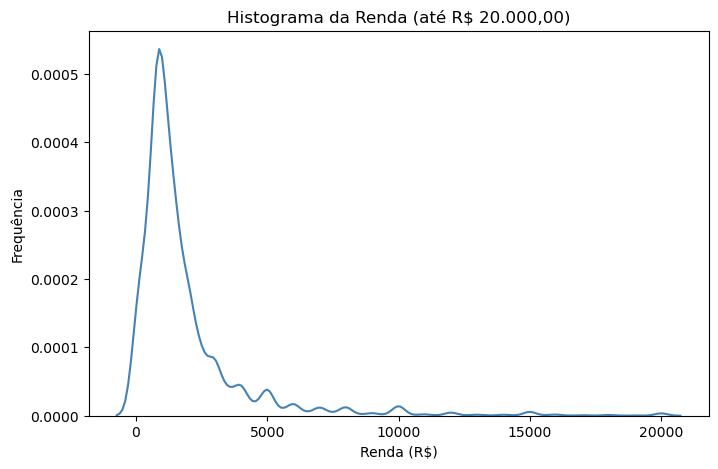

In [56]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['Renda'] <= 20000]['Renda'], fill=False, color='steelblue', bw_adjust=1)
plt.title('Histograma da Renda (até R$ 20.000,00)')
plt.xlabel('Renda (R$)')
plt.ylabel('Frequência')
plt.show()

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [63]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [64]:
df['sexo_nominal'] = df['Sexo'].map(sexo)
df['cor_nominal'] = df['Cor'].map(cor)
df['AnosEstudo_nominal'] = df['Anos de Estudo'].map(anos_de_estudo)
df['UF_nominal'] = df['UF'].map(uf)

In [65]:
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe_Renda,sexo_nominal,cor_nominal,AnosEstudo_nominal,UF_nominal
0,11,0,23,8,12,800,1.603808,E (≤5 SM),Masculino,Parda,11 anos,Rondônia
1,11,1,23,2,12,1150,1.739790,E (≤5 SM),Feminino,Branca,11 anos,Rondônia
2,11,1,35,8,15,880,1.760444,E (≤5 SM),Feminino,Parda,14 anos,Rondônia
3,11,0,46,2,6,3500,1.783158,E (≤5 SM),Masculino,Branca,5 anos,Rondônia
4,11,1,47,8,9,150,1.690631,E (≤5 SM),Feminino,Parda,8 anos,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030,E (≤5 SM),Feminino,Branca,10 anos,Distrito Federal
76836,53,0,30,4,7,1500,1.792934,E (≤5 SM),Masculino,Preta,6 anos,Distrito Federal
76837,53,0,32,8,12,1300,1.830587,E (≤5 SM),Masculino,Parda,11 anos,Distrito Federal
76838,53,0,57,8,4,1500,1.726344,E (≤5 SM),Masculino,Parda,3 anos,Distrito Federal


In [67]:
tab_freq_sexo_cor = pd.crosstab(df['sexo_nominal'], df['cor_nominal'])
tab_freq_sexo_cor

cor_nominal,Amarela,Branca,Indígena,Parda,Preta
sexo_nominal,,,,,
Feminino,117,9621,101,10862,2889
Masculino,235,22194,256,25063,5502


In [70]:
percentual = tab_freq_sexo_cor / tab_freq_sexo_cor.values.sum() * 100
percentual_rounded = percentual.round(3)
percentual_rounded

cor_nominal,Amarela,Branca,Indígena,Parda,Preta
sexo_nominal,,,,,
Feminino,0.152,12.521,0.131,14.136,3.76
Masculino,0.306,28.883,0.333,32.617,7.16


> ### Conclusões

A tabela apresentada realiza um cruzamento entre as variáveis de gênero e cor/raça, permitindo uma análise mais aprofundada da composição demográfica da população estudada.

Observa-se que as categorias “Parda” e “Branca” predominam em ambos os gêneros, representando conjuntamente cerca de 46,66% da população feminina (14,14% + 12,52%) e aproximadamente 61,50% da população masculina (32,62% + 28,88%). Esses dados indicam que a maioria dos indivíduos se identifica como pertencente a esses grupos étnico-raciais, refletindo o perfil demográfico majoritário do país.

Por outro lado, as categorias “Indígena” e “Amarela” aparecem com proporções significativamente menores em ambos os gêneros, com aproximadamente 0,13% e 0,15% para o sexo feminino, e 0,33% e 0,31% para o sexo masculino, respectivamente. Tal distribuição corrobora a menor representatividade desses grupos na população geral.

Além disso, a categoria “Preta” apresenta valores intermediários, correspondendo a cerca de 3,76% na população feminina e 7,16% na masculina, indicando uma presença relevante, ainda que inferior às categorias majoritárias.

Em síntese, a análise quantitativa evidencia que a população se concentra majoritariamente nas categorias “Parda” e “Branca”, com menor representatividade dos grupos indígenas e amarelos, e uma participação intermediária dos indivíduos que se identificam como pretos. Essas informações são essenciais para compreender a dinâmica étnico-racial da população e subsidiar políticas públicas que considerem essa diversidade.



## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [71]:
media = df['Renda'].mean()
media

2000.3831988547631

### Obtenha a mediana

In [73]:
mediana = df['Renda'].median()
mediana

1200.0

### Obtenha a moda

In [79]:
moda = df['Renda'].mode()
moda[0]

788

### Obtenha o desvio médio absoluto

In [82]:
desvio_absoluto = (df['Renda'] - df['Renda'].mean()).abs().mean()
desvio_absoluto

1526.4951371638058

### Obtenha a variância

In [84]:
var = df['Renda'].var()
var

11044906.00622118

### Obtenha o desvio-padrão

In [86]:
dp = df['Renda'].std()
dp

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [89]:
renda_sexo_cor = pd.crosstab(df['sexo_nominal'], df['cor_nominal'], values= df['Renda'], aggfunc=['mean','median','max'])
renda_sexo_cor

mean                                                      \
cor_nominal       Amarela       Branca     Indígena        Parda        Preta   
sexo_nominal                                                                    
Feminino      3027.341880  2109.866750  2464.386139  1176.758516  1134.596400   
Masculino     4758.251064  2925.744435  1081.710938  1659.577425  1603.861687   

              median                                      max          \
cor_nominal  Amarela  Branca Indígena   Parda   Preta Amarela  Branca   
sexo_nominal                                                            
Feminino      1500.0  1200.0    788.0   800.0   800.0   20000  100000   
Masculino     2800.0  1700.0    797.5  1200.0  1200.0   50000  200000   

                                      
cor_nominal  Indígena   Parda  Preta  
sexo_nominal                          
Feminino       120000   30000  23000  
Masculino       10000  100000  50000

### Conclusões

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [94]:
dispersao_renda = df.groupby(['sexo_nominal', 'cor_nominal'])['Renda'].agg(
    std='std',
    var='var',
    mad=lambda x: (x - x.mean()).abs().mean()
)
dispersao_renda

std           var          mad
sexo_nominal cor_nominal                                         
Feminino     Amarela       3731.173660  1.392166e+07  2549.146322
             Branca        3251.013154  1.056909e+07  1670.967106
             Indígena     11957.498292  1.429818e+08  3007.892952
             Parda         1596.233048  2.547960e+06   811.580946
             Preta         1349.799809  1.821960e+06   705.453357
Masculino    Amarela       5740.824820  3.295707e+07  3709.597211
             Branca        4750.791872  2.257002e+07  2261.012346
             Indígena      1204.093490  1.449841e+06   798.910889
             Parda         2312.087184  5.345747e+06  1125.827704
             Preta         1936.309271  3.749294e+06   975.602482

> ### Conclusões

O desvio padrão revela que os valores de renda são mais dispersos entre brancos e pardos, indicando maior variabilidade nesses grupos. Já o desvio médio absoluto (MAD) reforça que, embora pretos e indígenas apresentem uma dispersão menor em torno da média, ela ainda é relevante. As diferenças entre os sexos são sutis, mas apontam para uma renda feminina ligeiramente mais homogênea, com menor variação.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

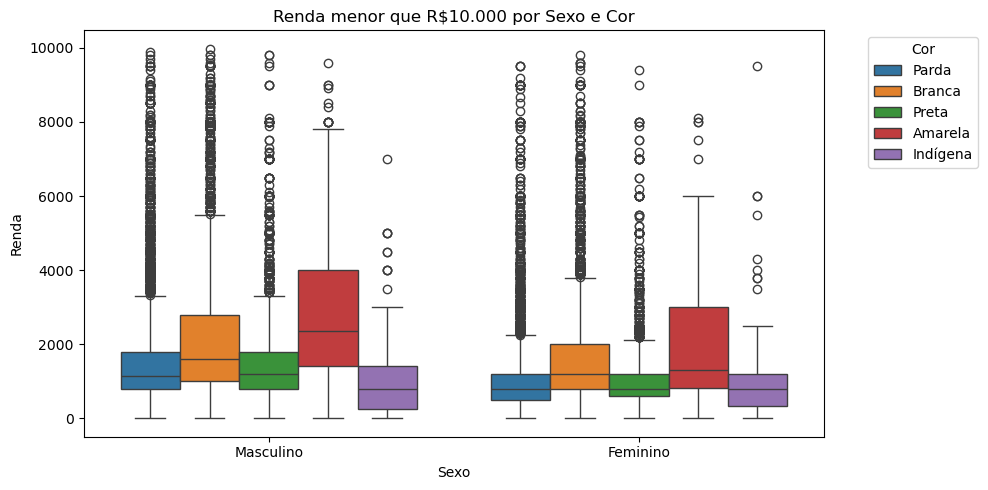

In [96]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df.query('Renda < 10000'), x='sexo_nominal', y='Renda', hue='cor_nominal')
plt.title('Renda menor que R$10.000 por Sexo e Cor')
plt.xlabel('Sexo')
plt.ylabel('Renda')
plt.legend(title='Cor', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

> ### Conclusões

De modo geral, homens apresentam medianas de renda superiores às das mulheres — como no caso dos brancos, em que a mediana masculina é visivelmente mais alta que a feminina. Os grupos indígenas e pretos têm as medianas mais baixas, acompanhadas de caixas maiores, o que indica maior desigualdade e dispersão na distribuição de renda. Além disso, a presença de caixas que se estendem significativamente para cima revela a existência de indivíduos com rendas muito acima da mediana dentro desses grupos.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [101]:
from scipy.stats import percentileofscore
perc_salario_minimo = percentileofscore(df['Renda'], sm)
print(f"% ≤ 1 SM: {perc_salario_minimo:.5f}%")

% ≤ 1 SM: 24.39094%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [104]:
valor_maximo = df['Renda'].quantile(0.99)
print(f"Valor que 99% das pessoas do datase ganham é <= R$ {valor_maximo:.5f}")

Valor que 99% das pessoas do datase ganham é <= R$ 15000.00000


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [107]:
renda_anos_estudo_sexo = df.groupby(['AnosEstudo_nominal', 'sexo_nominal'])['Renda'].agg(['mean', 'median', 'max', 'std']).unstack()
renda_anos_estudo_sexo

mean                median            \
sexo_nominal                       Feminino    Masculino Feminino Masculino   
AnosEstudo_nominal                                                            
1 ano                            492.771987   895.629047    400.0     788.0   
10 anos                          925.919225  1731.270847    800.0    1218.0   
11 anos                         1286.790889  2117.060504   1000.0    1500.0   
12 anos                         1682.313725  2470.330776   1200.0    1800.0   
13 anos                         1911.730047  3195.099154   1300.0    2400.0   
14 anos                         2226.460457  3706.620269   1600.0    2500.0   
15 anos ou mais                 3899.513231  6134.279790   2800.0    4000.0   
2 anos                           529.911638   931.178986    450.0     788.0   
3 anos                           546.853916  1109.203862    500.0     800.0   
4 anos                           704.279111  1302.329283    788.0    1000.0   
5 anos                           781.389776  1338.653218    788.0    1045.0   
6 anos                           833.732824  1448.875419    788.0    1200.0   
7 anos                           830.751004  1465.497940    788.0    1200.0   
8 anos                           933.615351  1639.396667    800.0    1300.0   
9 anos                           868.021700  1508.038850    788.0    1200.0   
Não determinados                 798.174419  1295.761905    788.0    1200.0   
Sem instrução e menos de 1 ano   516.201748   799.494638    390.0     700.0   

                                    max                    std               
sexo_nominal                   Feminino Masculino     Feminino    Masculino  
AnosEstudo_nominal                                                           
1 ano                              2000     30000   425.291842  1331.950552  
10 anos                            6000     45000   620.611907  2078.609734  
11 anos                          100000    200000  1819.040417  2676.538942  
12 anos                          120000     30000  4851.833513  2268.081538  
13 anos                           20000     25000  2053.789771  2797.116800  
14 anos                           20000     50000  2064.083336  3987.214974  
15 anos ou mais                  100000    200000  4212.770709  7447.613594  
2 anos                             4000     40000   498.234168  1435.173827  
3 anos                             3500     80000   424.124446  2143.800133  
4 anos                            10000     50000   629.553397  1419.821787  
5 anos                             8000     35000   635.782641  1484.650587  
6 anos                             6000     25000   574.547028  1476.628602  
7 anos                             9000     40000   602.038029  1419.708673  
8 anos                            18000     30000   896.781213  1515.583715  
9 anos                            20000     60000   973.221652  2137.664774  
Não determinados                   3000      7000   459.985964   979.648745  
Sem instrução e menos de 1 ano    10000     30000   639.311534  1023.904884

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

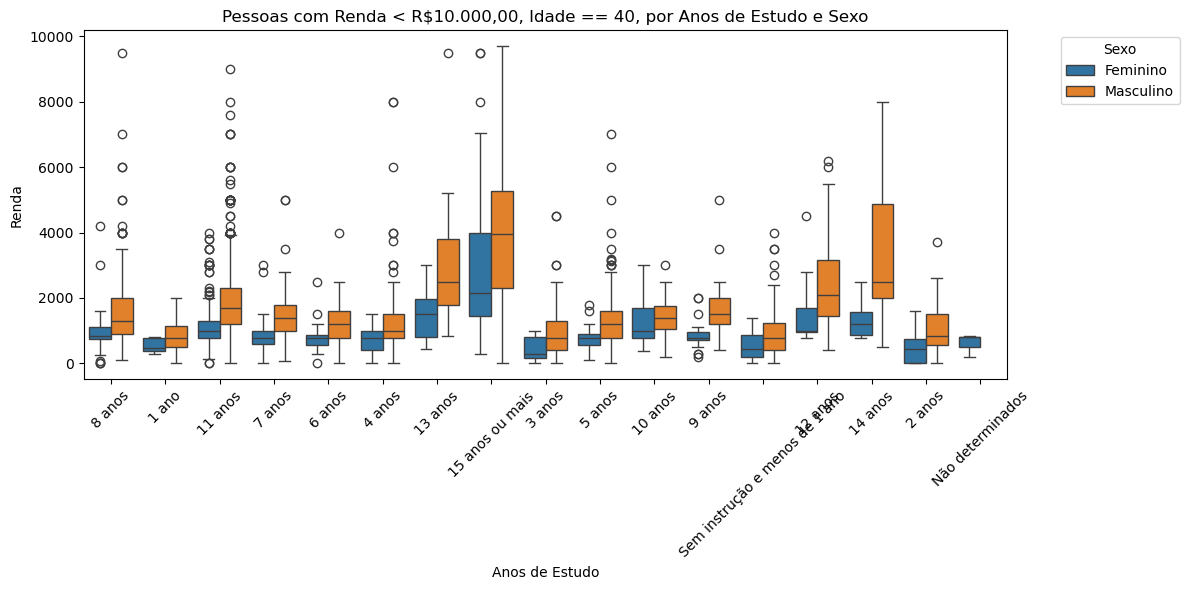

In [111]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.query('Renda < 10000 and Idade == 40'), x='AnosEstudo_nominal', y='Renda', hue='sexo_nominal')
plt.title('Pessoas com Renda < R$10.000,00, Idade == 40, por Anos de Estudo e Sexo')
plt.xlabel('Anos de Estudo')
plt.ylabel('Renda')
plt.xticks(rotation=45)
plt.legend(title='Sexo', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

> ### Conclusões

Ao considerar apenas pessoas com 40 anos, a diferença de renda entre níveis de escolaridade ainda é evidente — quanto maior a escolaridade, maior o rendimento.
Mesmo entre indivíduos da mesma idade, a educação continua sendo um forte determinante da renda.
A desigualdade de gênero também persiste: em todos os níveis de instrução, os homens apresentam rendimentos medianos superiores aos das mulheres.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [112]:
renda_uf = df.groupby('UF_nominal')['Renda'].agg(['mean','median','max','std'])
renda_uf

,mean,median,max,std
UF_nominal,,,,
Acre,1506.091782,900.0,30000,2276.233415
Alagoas,1144.552602,788.0,11000,1237.856197
Amapá,1861.353516,1200.0,15580,2020.688632
Amazonas,1445.130100,900.0,22000,1757.935591
Bahia,1429.645094,800.0,200000,3507.917248
Ceará,1255.403692,789.0,25000,1821.963536
Distrito Federal,4241.954722,2000.0,100000,5550.463338
Espírito Santo,2026.383852,1274.0,100000,3513.846868
Goiás,1994.580794,1500.0,30000,2221.933065


### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

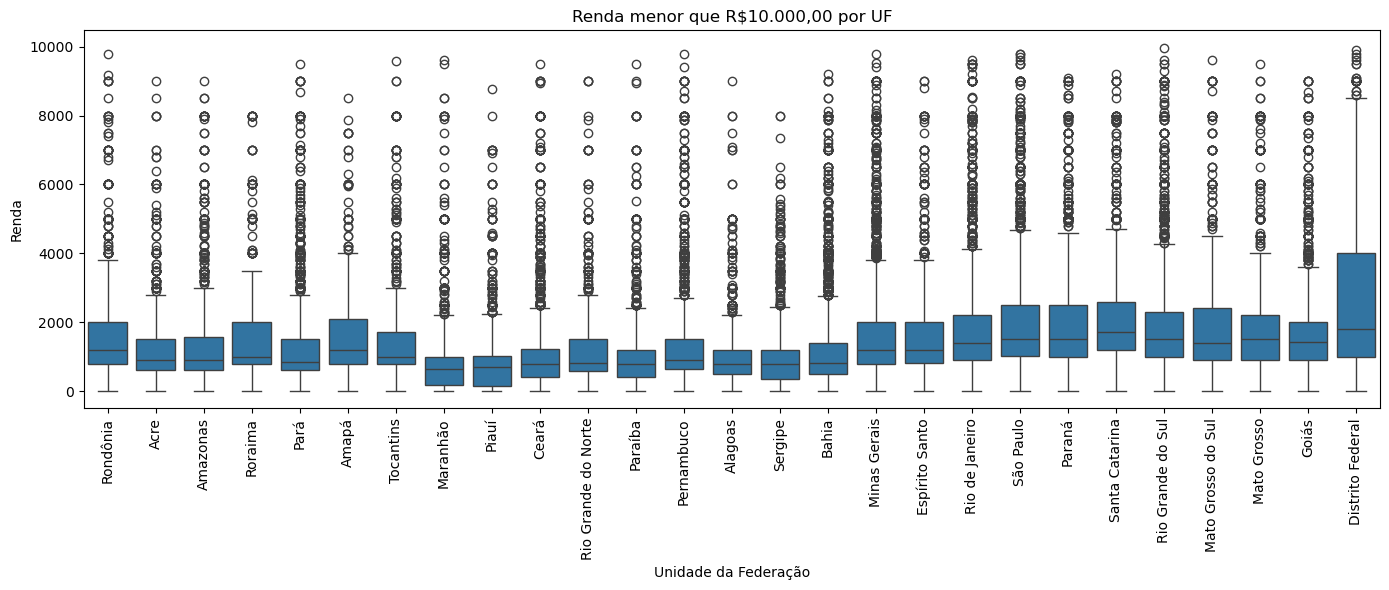

In [114]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df.query('Renda < 10000'), x='UF_nominal', y='Renda')
plt.title('Renda menor que R$10.000,00 por UF')
plt.xlabel('Unidade da Federação')
plt.ylabel('Renda')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

> ### Conclusões

Visualmente, as regiões Sul e Sudeste se destacam por apresentarem medianas de renda mais altas e distribuições mais elevadas em comparação ao Norte e Nordeste.
Além disso, alguns estados exibem outliers bastante elevados, revelando a presença de indivíduos com rendas significativamente acima da média, mesmo em contextos onde a renda geral é mais baixa.

## Finalizando.

Resolva 3 exercícios de sua escolha do Capítulo 1 do livro **OpenIntro Statistics**

## Exercício 1 - Chia seeds and weight loss.

Chia Pets – those terra-cotta figurines that sprout fuzzy green hair –
made the chia plant a household name. But chia has gained an entirely new reputation as a diet supplement.
In one 2009 study, a team of researchers recruited 38 men and divided them randomly into two groups:
treatment or control. They also recruited 38 women, and they randomly placed half of these participants
into the treatment group and the other half into the control group. One group was given 25 grams of chia
seeds twice a day, and the other was given a placebo. The subjects volunteered to be a part of the study.
After 12 weeks, the scientists found no significant difference between the groups in appetite or weight loss.<br>
(a) What type of study is this?<br>
(b) What are the experimental and control treatments in this study?<br>
(c) Has blocking been used in this study? If so, what is the blocking variable?<br>
(d) Has blinding been used in this study?<br>
(e) Comment on whether or not we can make a causal statement, and indicate whether or not we can
generalize the conclusion to the population at large.<br>

A - ) O estudo é um experimento aleatório controlado porque os participantes foram aleatoriamente designados para grupos de tratamento e controle, e foi administrada uma intervenção ativa (chia ou placebo) com posterior comparação de resultados.

B- ) O tratamento experimental consiste no consumo de 25 g de sementes de chia duas vezes ao dia. O tratamento de controle é o consumo de um placebo sem ingredientes ativos.

C- ) Sim, houve uso de bloqueio. A variável de bloqueio foi o sexo dos participantes (masculino ou feminino), pois os participantes foram divididos por sexo antes da alocação aleatória aos grupos de tratamento e controle.

D- ) Embora o texto não diga explicitamente, o uso de placebo indica que houve cegamento dos participantes, caracterizando um estudo com cegamento simples. Não há informação suficiente para afirmar se houve cegamento dos pesquisadores (duplo-cego).



## Exercício 2 - Buteyko method, study components.

The Buteyko method is a shallow breathing technique developed by Konstantin Buteyko, a Russian doctor, in 1952. Anecdotal evidence suggests that the Buteyko
method can reduce asthma symptoms and improve quality of life. In a scientific study to determine the
effectiveness of this method, researchers recruited 600 asthma patients aged 18-69 who relied on medication
for asthma treatment. These patients were randomly split into two research groups: one practiced the
Buteyko method and the other did not. Patients were scored on quality of life, activity, asthma symptoms,
and medication reduction on a scale from 0 to 10. On average, the participants in the Buteyko group
experienced a significant reduction in asthma symptoms and an improvement in quality of life.<br>
(a) Identify the main research question of the study.<br>
(b) Who are the subjects in this study, and how many are included?<br>
(c) What are the variables in the study? Identify each variable as numerical or categorical. If numerical,
state whether the variable is discrete or continuous. If categorical, state whether the variable is ordinal.

A - ) A principal pergunta de pesquisa do estudo é: O método Buteyko é eficaz na redução dos sintomas da asma e na melhora da qualidade de vida de pacientes asmáticos que dependem de medicação?

B- ) Os sujeitos do estudo são pacientes com asma, com idades entre 18 e 69 anos, que dependem de medicação para tratar a doença.
Foram incluídos 600 pacientes no total.

C- ) As variáveis do estudo são:<br>
<ul>Grupo de tratamento (Buteyko ou Controle): categórica nominal.<br>
Idade (em anos): numérica contínua.<br>
Qualidade de vida (escala de 0 a 10): numérica discreta (ou categórica ordinal).<br>
Nível de atividade (escala de 0 a 10): numérica discreta (ou categórica ordinal).<br>
Sintomas de asma (escala de 0 a 10): numérica discreta (ou categórica ordinal).<br>
Redução na medicação (escala de 0 a 10): numérica discreta (ou categórica ordinal).

## Exercício 3 -  Migraine and acupuncture, Part I. 

A migraine is a particularly painful type of headache, which patients
sometimes wish to treat with acupuncture. To determine whether acupuncture relieves migraine pain,
researchers conducted a randomized controlled study where 89 females diagnosed with migraine headaches
were randomly assigned to one of two groups: treatment or control. 43 patients in the treatment group
received acupuncture that is specifically designed to treat migraines. 46 patients in the control group
received placebo acupuncture (needle insertion at non-acupoint locations). 24 hours after patients received
acupuncture, they were asked if they were pain free. Results are summarized in the contingency table below.<br>
(a) What percent of patients in the treatment group were pain free 24 hours after receiving acupuncture?<br>
(b) What percent were pain free in the control group?<br>
(c) In which group did a higher percent of patients become pain free 24 hours after receiving acupuncture?<br>
(d) Your findings so far might suggest that acupuncture is an effective treatment for migraines for all people
who suffer from migraines. However, this is not the only possible conclusion that can be drawn based
on your findings so far. What is one other possible explanation for the observed difference between the
percentages of patients that are pain free 24 hours after receiving acupuncture in the two groups?

In [122]:
treatment_total = 43             
treatment_pain_free = 10          

control_total = 46               
control_pain_free = 2             

percent_treatment_pain_free = (treatment_pain_free / treatment_total) * 100
percent_control_pain_free = (control_pain_free / control_total) * 100


higher_group = "treatment" if percent_treatment_pain_free > percent_control_pain_free else "control"


print(f"Percentual de pacientes sem dor no grupo de tratamento: {percent_treatment_pain_free:.2f}%")
print(f"Percentual de pacientes sem dor no grupo de controle: {percent_control_pain_free:.2f}%")
print(f"Grupo com maior percentual de pacientes sem dor: {higher_group}")

Percentual de pacientes sem dor no grupo de tratamento: 23.26%
Percentual de pacientes sem dor no grupo de controle: 4.35%
Grupo com maior percentual de pacientes sem dor: treatment


(a) Percentual de pacientes no grupo de tratamento que ficaram sem dor após 24 horas: 23.26% <br>
(b) Percentual de pacientes no grupo controle que ficaram sem dor após 24 horas: 4.35% <br>
(c) O grupo com maior percentual de pacientes sem dor após 24 horas: Grupo de tratamento <br>
(d) Uma outra explicação possível para a diferença observada (além da eficácia da acupuntura) pode ser o efeito placebo.
Mesmo que a acupuntura real tenha sido aplicada em pontos específicos e a placebo em locais ineficazes, os pacientes podem ter acreditado que estavam recebendo um tratamento eficaz, o que pode ter influenciado suas percepções de dor. Esse tipo de resposta é comum em estudos de dor e tratamentos alternativos. <br>